### LSTM training and testing

### Input: x = 0:0.02:3
### Output: y = sin(2.pi.x) + N, where N = Uniform Random Number between 0 and 1 (data-train, \*2, \*3.csv)
##           or
### Output: y = tanh(3(x-1.5)) + N, where N = Uniform Random Number between 0 and 1 (data-train4.csv)

In [236]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
# dataframe = read_csv('data/data-train2.csv', usecols=[1], engine='python', skipfooter=3) # no noise
dataframe = read_csv('data/data-train2.csv', usecols=[1], engine='python', skipfooter=3) # 1.0 uniform noise
# dataframe = read_csv('data/data-train2.csv', usecols=[1], engine='python', skipfooter=3) # 0.5 uniform noise
#dataframe = read_csv('data/data-train4.csv', usecols=[1], engine='python', skipfooter=3) # 1.0 uniform noise

dataset = dataframe.values

dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


## Train LSTM and Predict

In [237]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(1, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/100
97/97 [==============================] - 4s 38ms/step - loss: 0.0842
Epoch 2/100
97/97 [==============================] - 0s 1ms/step - loss: 0.0416
Epoch 3/100
97/97 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 4/100
97/97 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 5/100
97/97 [==============================] - 0s 1ms/step - loss: 0.0258
Epoch 6/100
97/97 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 7/100
97/97 [==============================] - 0s 1ms/step - loss: 0.0251
Epoch 8/100
97/97 [==============================] - 0s 1ms/step - loss: 0.0246
Epoch 9/100
97/97 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 10/100
97/97 [==============================] - 0s 1ms/step - loss: 0.0240
Epoch 11/100
97/97 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 12/100
97/97 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 13/100
97/97 [================

## Create Plots

In [238]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


Train Score: 0.42 RMSE
Test Score: 0.37 RMSE


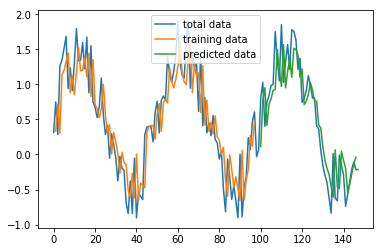

In [239]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(('total data','training data', 'predicted data'))

plt.show()

## First Test Data

### Input: x = 0:0.02:3
### Output: y = sin(pi.x)

Test Score 2: 0.14 RMSE


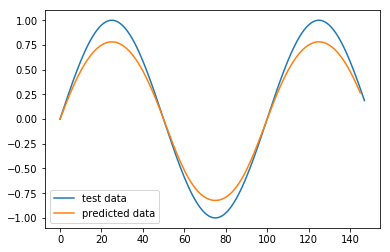

In [240]:
# load the dataset
dataframe2 = read_csv('data/data-test.csv', usecols=[1], engine='python', skipfooter=3)
dataset2 = dataframe2.values
dataset2 = dataset2.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset2 = scaler.fit_transform(dataset2)

test2 = dataset2

# look_back = 1
testX2, testY2 = create_dataset(test2, look_back)
testX2 = numpy.reshape(testX2, (testX2.shape[0], 1, testX2.shape[1]))

testPredict2 = model.predict(testX2)

testPredict2 = scaler.inverse_transform(testPredict2)
testY2 = scaler.inverse_transform([testY2])

testScore2 = math.sqrt(mean_squared_error(testY2[0], testPredict2[:,0]))
print('Test Score 2: %.2f RMSE' % (testScore2))

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset2))
plt.plot(testPredict2)
plt.legend(('test data', 'predicted data'))
plt.show()


## Second Test Data

### Input: x = 0:0.02:3
### Output: y = exp(-0.5.x)sin(4.pi.x)

Test Score 2: 0.11 RMSE


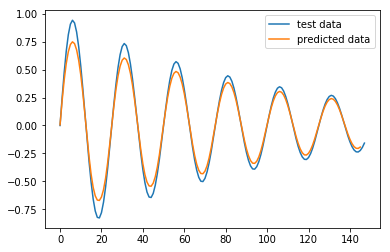

In [241]:
# load the dataset
dataframe2 = read_csv('data/data-test2.csv', usecols=[1], engine='python', skipfooter=3)
dataset2 = dataframe2.values
dataset2 = dataset2.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset2 = scaler.fit_transform(dataset2)

test2 = dataset2

# look_back = 1
testX2, testY2 = create_dataset(test2, look_back)
testX2 = numpy.reshape(testX2, (testX2.shape[0], 1, testX2.shape[1]))

testPredict2 = model.predict(testX2)

testPredict2 = scaler.inverse_transform(testPredict2)
testY2 = scaler.inverse_transform([testY2])

testScore2 = math.sqrt(mean_squared_error(testY2[0], testPredict2[:,0]))
print('Test Score 2: %.2f RMSE' % (testScore2))

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset2))
plt.plot(testPredict2)
plt.legend(('test data', 'predicted data'))
plt.show()


## Third Test Data

### Input: x = 0:0.02:3
### Output: y = sin(2.pi.x)sin(4.pi.x)

Test Score 2: 0.16 RMSE


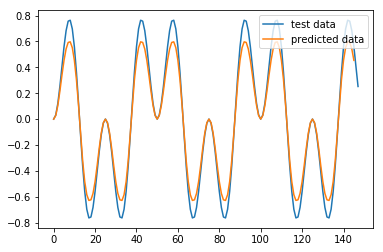

In [242]:
# load the dataset
dataframe2 = read_csv('data/data-test3.csv', usecols=[1], engine='python', skipfooter=3)
dataset2 = dataframe2.values
dataset2 = dataset2.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset2 = scaler.fit_transform(dataset2)

test2 = dataset2

# look_back = 1
testX2, testY2 = create_dataset(test2, look_back)
testX2 = numpy.reshape(testX2, (testX2.shape[0], 1, testX2.shape[1]))

testPredict2 = model.predict(testX2)

testPredict2 = scaler.inverse_transform(testPredict2)
testY2 = scaler.inverse_transform([testY2])

testScore2 = math.sqrt(mean_squared_error(testY2[0], testPredict2[:,0]))
print('Test Score 2: %.2f RMSE' % (testScore2))

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset2))
plt.plot(testPredict2)
plt.legend(('test data', 'predicted data'))
plt.show()

## FourthTest Data

### Input: x = 0:0.02:3
### Output: y = sin(2.pi.x)sin(4.pi.x)

Test Score 2: 0.17 RMSE


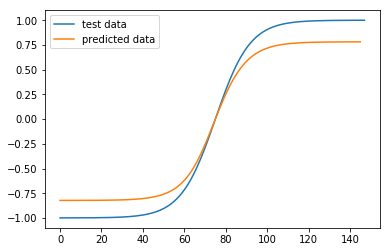

In [243]:
# load the dataset
dataframe2 = read_csv('data/data-test4.csv', usecols=[1], engine='python', skipfooter=3)
dataset2 = dataframe2.values
dataset2 = dataset2.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset2 = scaler.fit_transform(dataset2)

test2 = dataset2

# look_back = 1
testX2, testY2 = create_dataset(test2, look_back)
testX2 = numpy.reshape(testX2, (testX2.shape[0], 1, testX2.shape[1]))

testPredict2 = model.predict(testX2)

testPredict2 = scaler.inverse_transform(testPredict2)
testY2 = scaler.inverse_transform([testY2])

testScore2 = math.sqrt(mean_squared_error(testY2[0], testPredict2[:,0]))
print('Test Score 2: %.2f RMSE' % (testScore2))

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset2))
plt.plot(testPredict2)
plt.legend(('test data', 'predicted data'))
plt.show()

## Fifth Test Data

### Input x = 0:0.02:3
### Output y = tanh(3\*(x-1.5))+0.5\*rand()

Test Score 2: 0.24 RMSE


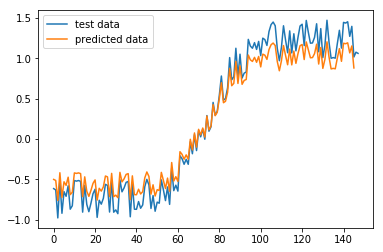

In [244]:
# load the dataset
dataframe2 = read_csv('data/data-test5.csv', usecols=[1], engine='python', skipfooter=3)
dataset2 = dataframe2.values
dataset2 = dataset2.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset2 = scaler.fit_transform(dataset2)

test2 = dataset2

# look_back = 1
testX2, testY2 = create_dataset(test2, look_back)
testX2 = numpy.reshape(testX2, (testX2.shape[0], 1, testX2.shape[1]))

testPredict2 = model.predict(testX2)

testPredict2 = scaler.inverse_transform(testPredict2)
testY2 = scaler.inverse_transform([testY2])

testScore2 = math.sqrt(mean_squared_error(testY2[0], testPredict2[:,0]))
print('Test Score 2: %.2f RMSE' % (testScore2))

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset2))
plt.plot(testPredict2)
plt.legend(('test data', 'predicted data'))
plt.show()